## Introduction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
happiness2015 = pd.read_csv('wh_2015.csv')
happiness2016 = pd.read_csv('wh_2016.csv')
happiness2017 = pd.read_csv('wh_2017.csv')

In [6]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

## Identifying Missing Values

In [12]:
missing_2015 = happiness2015.isnull().sum()

In [11]:
missing_2016 = happiness2016.isnull().sum()

In [10]:
missing_2017 = happiness2017.isnull().sum()

## Correcting Data Cleaning Errors that Result in Missing Values

In [13]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()

In [15]:
happiness2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [18]:
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.replace('\s+', ' ').str.strip().str.upper()
happiness2016.columns 

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'LOWER CONFIDENCE INTERVAL', 'UPPER CONFIDENCE INTERVAL',
       'ECONOMY GDP PER CAPITA', 'FAMILY', 'HEALTH LIFE EXPECTANCY', 'FREEDOM',
       'TRUST GOVERNMENT CORRUPTION', 'GENEROSITY', 'DYSTOPIA RESIDUAL',
       'YEAR'],
      dtype='object')

In [20]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Year'],
      dtype='object')

In [21]:
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns 

Index(['COUNTRY', 'REGION', 'HAPPINESS RANK', 'HAPPINESS SCORE',
       'STANDARD ERROR', 'ECONOMY GDP PER CAPITA', 'FAMILY',
       'HEALTH LIFE EXPECTANCY', 'FREEDOM', 'TRUST GOVERNMENT CORRUPTION',
       'GENEROSITY', 'DYSTOPIA RESIDUAL', 'YEAR'],
      dtype='object')

In [101]:
combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)

In [102]:
missing = combined.isnull().sum()

## Visualizing Missing Data

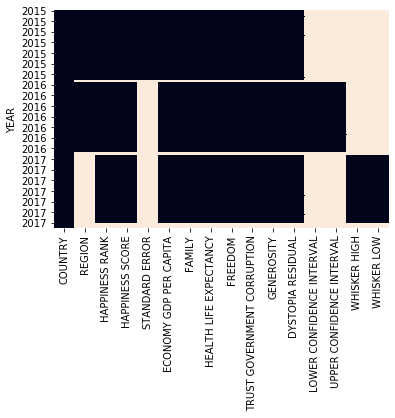

In [103]:
combined_updated = combined.set_index('YEAR')
sns.heatmap(combined_updated.isnull(), cbar=False);

In [104]:
regions_2017 = combined[combined['YEAR'] == 2017]['REGION']

In [105]:
missing = regions_2017.isnull().sum()

## Using Data From Additional Sources to Fill in Missing Values

1. Check for errors in data cleaning/transformation.
2. Use data from additional sources to fill missing values.
3. Drop row/column.
4. Fill missing values with reasonable estimates computed from the available data.

In [106]:
happiness2016['COUNTRY'].sort_values().to_list() == happiness2015['COUNTRY'].sort_values().to_list()

True

In [107]:
regions_2015 = happiness2015[['COUNTRY', 'REGION']]
regions_2015.isnull().sum()

COUNTRY    0
REGION     6
dtype: int64

In [108]:
regions_2015[regions_2015['REGION'].isnull()]

,COUNTRY,REGION
158,Belize,NaN
159,Namibia,NaN
160,Puerto Rico,NaN
161,Somalia,NaN
162,Somaliland Region,NaN
163,South Sudan,NaN


In [109]:
regions_2016 = happiness2016[['COUNTRY', 'REGION']]
regions_2016.isnull().sum()

COUNTRY    0
REGION     7
dtype: int64

In [110]:
regions_2016[regions_2016['REGION'].isnull()]

,COUNTRY,REGION
157,Central African Republic,NaN
158,Djibouti,NaN
159,Lesotho,NaN
160,Mozambique,NaN
161,Oman,NaN
162,Somaliland region,NaN
163,Swaziland,NaN


In [111]:
regions = pd.merge(regions_2015, regions_2016, how='left', on='COUNTRY')

In [112]:
regions.loc[regions['REGION_x'].isnull(), 'REGION_x'] = regions.loc[regions['REGION_x'].isnull(), 'REGION_y']

In [113]:
regions.drop('REGION_y', axis=1, inplace=True)
regions.rename({'REGION_x': 'REGION'}, axis=1, inplace=True)

In [115]:
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined = combined.drop('REGION_x', axis = 1)
missing = combined.isnull().sum()

In [116]:
missing

COUNTRY                          0
HAPPINESS RANK                  22
HAPPINESS SCORE                 22
STANDARD ERROR                 334
ECONOMY GDP PER CAPITA          22
FAMILY                          22
HEALTH LIFE EXPECTANCY          22
FREEDOM                         22
TRUST GOVERNMENT CORRUPTION     22
GENEROSITY                      22
DYSTOPIA RESIDUAL               22
YEAR                             0
LOWER CONFIDENCE INTERVAL      335
UPPER CONFIDENCE INTERVAL      335
WHISKER HIGH                   337
WHISKER LOW                    337
REGION_y                         0
dtype: int64

## Identifying Duplicates Values

In [117]:
combined.rename({'REGION_y': 'REGION'}, axis=1, inplace=True)

In [124]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
combined[dups]

,COUNTRY,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY GDP PER CAPITA,FAMILY,HEALTH LIFE EXPECTANCY,FREEDOM,TRUST GOVERNMENT CORRUPTION,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,WHISKER HIGH,WHISKER LOW,REGION
162,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,Sub-Saharan Africa
326,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016,NaN,NaN,NaN,NaN,Sub-Saharan Africa
489,SOMALILAND REGION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017,NaN,NaN,NaN,NaN,Sub-Saharan Africa


## Correcting Duplicates Values

In [126]:
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

## Handle Missing Values by Dropping Columns

In [130]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 
                   'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']

In [131]:
combined = combined.drop(columns_to_drop, axis=1)

In [132]:
combined.isnull().sum()

COUNTRY                         0
HAPPINESS RANK                 19
HAPPINESS SCORE                19
ECONOMY GDP PER CAPITA         19
FAMILY                         19
HEALTH LIFE EXPECTANCY         19
FREEDOM                        19
TRUST GOVERNMENT CORRUPTION    19
GENEROSITY                     19
DYSTOPIA RESIDUAL              19
YEAR                            0
REGION                          0
dtype: int64

## Handle Missing Values by Dropping Columns Continued

In [133]:
combined.notnull().sum().sort_values()

HAPPINESS RANK                 470
HAPPINESS SCORE                470
ECONOMY GDP PER CAPITA         470
FAMILY                         470
HEALTH LIFE EXPECTANCY         470
FREEDOM                        470
TRUST GOVERNMENT CORRUPTION    470
GENEROSITY                     470
DYSTOPIA RESIDUAL              470
COUNTRY                        489
YEAR                           489
REGION                         489
dtype: int64

In [134]:
combined = combined.dropna(axis=1, thresh=159)

In [135]:
missing = combined.isnull().sum()

## Handling Missing Values with Imputation

There are many options for choosing the replacement value, including:

* A constant value
* The mean of the column
* The median of the column
* The mode of the column

In [137]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
happiness_mean

5.370727659882891

In [138]:
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)

In [139]:
combined['HAPPINESS SCORE UPDATED'].mean()

5.370727659882891

## Dropping Rows

In [140]:
combined = combined.dropna()
missing = combined.isnull().sum()

In [141]:
missing

COUNTRY                        0
HAPPINESS RANK                 0
HAPPINESS SCORE                0
ECONOMY GDP PER CAPITA         0
FAMILY                         0
HEALTH LIFE EXPECTANCY         0
FREEDOM                        0
TRUST GOVERNMENT CORRUPTION    0
GENEROSITY                     0
DYSTOPIA RESIDUAL              0
YEAR                           0
REGION                         0
HAPPINESS SCORE UPDATED        0
dtype: int64

## Summary

We also started to set a more defined data cleaning workflow, in which we:

* Set a goal for the project.
* Researched and tried to understand the data.
* Determined what data was needed to complete our analysis.
* Added columns.
* Cleaned specific data types.
* Combined data sets.
* Removed duplicate values.
* Handled the missing values.